# Stock Market Prediction from Sentiment of Financial News

In this project, I have primarily tried to predict the movement of the stock market indices based on the sentiments of the daily financial news articles. In this notebook, I have performed each of the tasks in specific sections. 

The data is primarily from two sources:
- The financial news data ranges from 2014-2017, collected from Pulse, managed by Zerodha, stock broker in India. 
- The raw stock market data (BSE SENSEX, Bombay Stock Exchange index) has been collected from the BSE website. 

I have performed a classification approach on the data. In the classification approach I have predicted the 'Label' (signifying the movement of the Close price of the stock market based on the previous day's data)I have used the BERT, fin BERT and NLTK Sentiment analyser to calculate the sentiment scores. finBERT is a language model trained on the financial news articles. I have used the transformer library of Hugging Face to implement the BERT Sentiment Analyser. 

Thus, from a high level prespective I am using the sentiment scores of the news headlines to predict how the stock market index will move. 

The flow of the code follows the following approach:

- Import all the libraries.
- Import the news headlines data from csv and stock market data from Wall Street Journal. 
- Pre-Process the textual data from news headlines dataset and and save in a new column. 
- Pre-Process the stock market data. 
- Calculate the sentiment of the news headlines and add them as a column.
- I am running both NLTK, BERT and finBERT Sentiment Analyser and saving the scores in seperate columns. 
- Save the data as a csv file for future use (so we don't have to run the BERT everytime as it can be time consuming). 
- Run a Min-Max scalar to normalize the numerical data. 
- Split data into train and test
- Run a Classification algorithm to predict the lables
- Run a Regression algorithm to predict the Close price

I have broken down the Notebook in the following sections:

- Import Library and Data
- Data Preparation and Pre-Processing
- Sentiment Analysis
- Classification Approach
- Results



## Section 1) Importing Libraries and Data

In [4]:
#Importing pandas and numpy to manipulate datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Importing nltk library
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud

#Importing the librairies from transformers libarry
#!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#Importing torch
import torch
#Importing requests to scrape the website
#import requests
#Importing beautiful soup to scrape the website
#from bs4 import BeautifulSoup
#import re

#Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#BERT

#Importing the AutoTokenizer module from the pre-trained BERT model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#Instantiating the model from the AutoModelForSequenceClassificationmodule of the pre-trained BERT Model
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mit_b\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [77]:
#Final Dataset being used will be named data_frame.csv, for purposes of the project
df = pd.read_csv("data_frame.csv")
#Cleaning the Data
df = df.drop(columns=['Unnamed: 0'])
df.head()
df_stock = df
df_stock.head()

,Date,Combined_Headlines,Open,High,Low,Close
0,30-06-2017,Border crisis: Army chief Rawat in Sikkim as C...,30824.97,30965.45,30680.66,30921.61
1,29-06-2017,"Sensex pushes higher, Nifty reclaims 9550, ahe...",30910.97,31097.92,30794.61,30857.52
2,28-06-2017,"Nifty ends below 9,500; Reliance Industries dr...",30988.87,31000.48,30798.70,30834.32
3,27-06-2017,"Sensex tanks 180 points, Nifty50 holds 9,500; ...",31194.68,31294.96,30847.08,30958.25
4,23-06-2017,Piramal Enterprises board gives nod to raise u...,31352.57,31365.39,31110.39,31138.21


## Section 2) Data Pre-Processing

In [ ]:
#I am processing the Combined Headlines and cleaning the text. 
#I will be placing the cleaned text in the column, Processed_Headlines

#Ignoring the Warning for this cell. 
warnings.filterwarnings('ignore')

#Defining function to pre-process the text of the News Headlines
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

#Removing the HTML tags and URLs from the data
df['Combined_Headlines']=df['Combined_Headlines'].apply(lambda x: BeautifulSoup(x).get_text())
df['Combined_Headlines']=df['Combined_Headlines'].apply(lambda x: re.sub(r"http\S+", "", x))
#Removing extra spaces from the text
df['Combined_Headlines']=df['Combined_Headlines'].apply(lambda x: re.sub(' +', ' ', x))
#Storing the processed text in 'Processed_Headlines' column. 
df['Processed_Headlines'] = df['Combined_Headlines'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
#Removing the stopwords from the text
df['Processed_Headlines']=df['Processed_Headlines'].apply(lambda x: " ".join([x for x in x.split() if x not in stop_words]))
#Lemmatization of the text
df['Processed_Headlines']=df['Processed_Headlines'].apply(lambda x:" ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
df.head()

In [ ]:
#Calculating the Daily Percentage change in the Close price of the Index
#I will be creating the label of 1/0 to be predicted later
df['Daily_Percentage_Change'] = df['Close'].pct_change()*100
df['Label'] = df['Daily_Percentage_Change'].apply(lambda x: 0 if x < 1 else 1)
df.head()

In [ ]:
#I will be dropping the na values from the dataframe
df = df.dropna()
df.head()

In [ ]:
#I will be dropping the columns not required hereafter
df = df.drop(columns=['Combined_Headlines','Open','High','Low','Close','Daily_Percentage_Change'])
df.head()

## WordCloud of Processed Textual Data

In [ ]:
df = pd.read_csv("Data_Frame_Sentiment_Scores.csv")
text = df['Processed_Headlines'].to_string()
word_cloud = WordCloud(collocations = False, background_color = 'white', width=3000, height=2000).generate(text)
plt.figure(figsize=(30,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see from the above wordcloud the financial news from India is overepresented by words like market, bank, gold, stock, india, deal, price, sensex, rupee, rbi, tata, dollar etc. This wordcloud is very beneficial to us to get a clearer understanding of the distribution of the words in the financial news dataset. 

## Section 3) Sentiment Analysis 

In this section, I have passed the Processed_Headlines through the sentiment analysis methods. I have used 3 sentiment analysis techniques in this section. 

- NLTK
- BERT
- finBERT

I have saved the sentiment analysis scores for each of the algorithms used and have used them further down the line to perform classification tasks on them. 

### Section 3.1) NLTK

In [ ]:
#I will be creating a new dataframe to store the results of the NLTK Sentiment scores:

In [ ]:
#NLTK Sentiment Analyser
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
df['NLTK_Negative_Scores'] = df['Processed_Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
df['NLTK_Positive_Scores'] = df['Processed_Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])
df['NLTK_Neutral_Scores'] = df['Processed_Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
df['NLTK_compound_Scores'] = df['Processed_Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
df.head()

### Section 3.2) BERT

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

def sentiment_score_pos(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    pos = prediction[:, 0].tolist()[0]
    return pos

def sentiment_score_neg(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    neg = prediction[:, 1].tolist()[0]
    return neg

def sentiment_score_neut(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    neutr = prediction[:, 2].tolist()[0]
    return neutr

In [ ]:
df['BERT_score']= df['Processed_Headlines'].apply(lambda x: sentiment_score(x[:512]))
df['BERT_pos']= df['Processed_Headlines'].apply(lambda x: sentiment_score_pos(x[:512]))
df['BERT_neg']= df['Processed_Headlines'].apply(lambda x: sentiment_score_neg(x[:512]))
df['BERT_neutr']= df['Processed_Headlines'].apply(lambda x: sentiment_score_neut(x[:512]))
df.head()

## Section 3.3) finBERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
def fin_sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

def fin_sentiment_score_pos(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    pos = prediction[:, 0].tolist()[0]
    return pos

def fin_sentiment_score_neg(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    neg = prediction[:, 1].tolist()[0]
    return neg

def fin_sentiment_score_neut(sent):
    tokens = tokenizer.encode(sent, return_tensors='pt')
    result = model(tokens)
    prediction = torch.nn.functional.softmax(result.logits, dim=-1)
    neutr = prediction[:, 2].tolist()[0]
    return neutr

In [ ]:
df['fin_BERT_score']= df['Processed_Headlines'].apply(lambda x: fin_sentiment_score(x[:1024]))
df['fin_BERT_pos']= df['Processed_Headlines'].apply(lambda x: fin_sentiment_score_pos(x[:1024]))
df['fin_BERT_neg']= df['Processed_Headlines'].apply(lambda x: fin_sentiment_score_neg(x[:1024]))
df['fin_BERT_neutr']= df['Processed_Headlines'].apply(lambda x: fin_sentiment_score_neut(x[:1024]))
df.head()

In [1]:
df.to_csv("Data_Frame_Sentiment_Scores.csv")

NameError: name 'df' is not defined

## Loading the data from the disk to run classification algorithms

In [5]:
#Reloading the data from disk
df = pd.read_csv("Data_Frame_Sentiment_Scores.csv")
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df.head()

,Date,Processed_Headlines,Label,NLTK_Negative_Scores,NLTK_Positive_Scores,NLTK_Neutral_Scores,NLTK_compound_Scores,BERT_score,BERT_pos,BERT_neg,BERT_neutr,fin_BERT_score,fin_BERT_pos,fin_BERT_neg,fin_BERT_neutr
0,29-06-2017,"sensex push higher , nifty reclaims 9550 , ahe...",0,0.077,0.126,0.797,0.9987,1,0.516302,0.254041,0.122045,1,0.872153,0.058974,0.068873
1,28-06-2017,"nifty end 9,500 ; reliance industry drag peopl...",0,0.137,0.130,0.733,-0.9800,1,0.592651,0.235079,0.099565,3,0.074567,0.169100,0.756332
2,27-06-2017,"sensex tank 180 point , nifty50 hold 9,500 ; b...",0,0.092,0.159,0.749,0.9995,1,0.482937,0.310596,0.120765,3,0.082285,0.134255,0.783460
3,23-06-2017,piramal enterprise board give nod raise r 125 ...,0,0.105,0.138,0.757,0.9966,1,0.802986,0.149463,0.035932,2,0.439414,0.494129,0.066457
4,22-06-2017,exclusive : fake online store reveal gambler '...,0,0.109,0.146,0.745,0.9975,1,0.663777,0.204110,0.073955,1,0.547651,0.067868,0.384480


## Understanding the class imbalance of the Label

In [6]:
#Printing the proportion of 0 and 1 in the Label column
count_0 = df['Label'].value_counts()[0]
print('Count of zeros in Column  Label : ', count_0)

count_1 = df['Label'].value_counts()[1]
print('Count of One in Column  Label : ', count_1)


Count of zeros in Column  Label :  619
Count of One in Column  Label :  162


## Section 4) Classification

### Section 4.1) Classification using NLTK

In [7]:
y = df['Label']
y

0      0
1      0
2      0
3      0
4      0
      ..
776    0
777    0
778    0
779    0
780    0
Name: Label, Length: 781, dtype: int64

In [8]:
y.astype(bool).sum(axis=0)

162

In [9]:
df.describe()

,Label,NLTK_Negative_Scores,NLTK_Positive_Scores,NLTK_Neutral_Scores,NLTK_compound_Scores,BERT_score,BERT_pos,BERT_neg,BERT_neutr,fin_BERT_score,fin_BERT_pos,fin_BERT_neg,fin_BERT_neutr
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.207426,0.103328,0.143088,0.753612,0.715933,1.098592,0.568081,0.238368,0.111107,2.166453,0.296828,0.285296,0.417876
std,0.405723,0.028114,0.031075,0.036994,0.658414,0.527948,0.151870,0.057491,0.053501,0.832328,0.250485,0.283807,0.267553
min,0.000000,0.000000,0.000000,0.316000,-0.999800,1.000000,0.007161,0.006489,0.017179,1.000000,0.010526,0.010795,0.018834
25%,0.000000,0.088000,0.129000,0.736000,0.980400,1.000000,0.470774,0.201485,0.074058,1.000000,0.098774,0.051969,0.164677
50%,0.000000,0.102000,0.143000,0.754000,0.998400,1.000000,0.589361,0.240120,0.103458,2.000000,0.197897,0.152743,0.382840
75%,0.000000,0.118000,0.156000,0.769000,0.999500,1.000000,0.676348,0.275786,0.139981,3.000000,0.473696,0.465974,0.661398
max,1.000000,0.247000,0.468000,1.000000,0.999900,5.000000,0.885699,0.433259,0.541517,3.000000,0.921603,0.968390,0.946581


In [10]:
X = df[['NLTK_Negative_Scores','NLTK_Positive_Scores','NLTK_Neutral_Scores','NLTK_compound_Scores']]
X

,NLTK_Negative_Scores,NLTK_Positive_Scores,NLTK_Neutral_Scores,NLTK_compound_Scores
0,0.077,0.126,0.797,0.9987
1,0.137,0.130,0.733,-0.9800
2,0.092,0.159,0.749,0.9995
3,0.105,0.138,0.757,0.9966
4,0.109,0.146,0.745,0.9975
...,...,...,...,...
776,0.163,0.215,0.622,0.0258
777,0.000,0.401,0.599,0.9246
778,0.000,0.464,0.536,0.7783
779,0.000,0.239,0.761,0.2960


In [11]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#X = X.values.reshape(-1)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X,y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 619, 1: 619})


In [12]:
# scaling the feature dataset
cols = ['NLTK_Negative_Scores','NLTK_Positive_Scores','NLTK_Neutral_Scores','NLTK_compound_Scores']
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_over = np.array(X_over).reshape((len(X_over) ,len(cols)))
X_over = scaler_x.fit_transform(X_over)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_over = np.array (y_over).reshape ((len(y_over), 1))
y_over = scaler_y.fit_transform (y_over)

# displaying the scaled feature dataset and the target variable
X_over, y_over

(array([[-0.37651822, -0.46153846,  0.40643275,  0.99879982],
        [ 0.10931174, -0.44444444,  0.21929825, -0.98019703],
        [-0.25506073, -0.32051282,  0.26608187,  0.99959994],
        ...,
        [-0.24696356, -0.26068376,  0.22222222,  0.99119868],
        [-0.06882591, -0.40598291,  0.25730994,  0.99639946],
        [-0.03643725, -0.38034188,  0.2251462 ,  0.99649947]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]))

In [13]:
#Splitting the dataset into train and test sets
X_train,X_test,y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (990, 4) (990, 1) Test:  ((248, 4), (248, 1))


### Section 4.1.1) Random Forest

In [14]:
#Fitting the Random Forest Classifier
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
#clf.fit(X_train, y_train)

#Predicting using the Model
rf_pred = clf.predict(X_test)

roc_nltk_rf = roc_auc_score(y_test, rf_pred)
accuracy_nltk_rf = accuracy_score(y_test, rf_pred)
f1_nltk_rf = f1_score(y_test, rf_pred)

print('ROCAUC score:',roc_auc_score(y_test, rf_pred))
print('Accuracy score:',accuracy_score(y_test, rf_pred))
print('F1 score:',f1_score(y_test, rf_pred))

ROCAUC score: 0.5469361147327249
Accuracy score: 0.5483870967741935
F1 score: 0.5725190839694657


### Section 4.1.2) KNN Classifier

In [15]:
#KNN Model to predit Label
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.ravel())
knn_pred = neigh.predict(X_test)

roc_nltk_knn = roc_auc_score(y_test, knn_pred)
accuracy_nltk_knn = accuracy_score(y_test, knn_pred)
f1_nltk_knn = f1_score(y_test, knn_pred)

print('ROCAUC score:',roc_auc_score(y_test, knn_pred))
print('Accuracy score:',accuracy_score(y_test, knn_pred))
print('F1 score:',f1_score(y_test, knn_pred))

ROCAUC score: 0.6992829204693612
Accuracy score: 0.7056451612903226
F1 score: 0.7474048442906573


### Section 4.1.3) Decision Tree

In [16]:
#Decision tree 

from sklearn.tree import DecisionTreeClassifier
dt_nltk = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_pred_nltk = dt_nltk.predict(X_test)

roc_nltk_dt = roc_auc_score(y_test, dt_pred_nltk)
accuracy_nltk_dt = accuracy_score(y_test, dt_pred_nltk)
f1_nltk_dt = f1_score(y_test, dt_pred_nltk)

print('ROCAUC score:',roc_auc_score(y_test, dt_pred_nltk))
print('Accuracy score:',accuracy_score(y_test, dt_pred_nltk))
print('F1 score:',f1_score(y_test, dt_pred_nltk))

ROCAUC score: 0.8574967405475881
Accuracy score: 0.8629032258064516
F1 score: 0.8811188811188813


### Section 4.1.4) Light Gradient Boosting Machine

In [17]:
lightgbm_nltk = HistGradientBoostingClassifier(max_bins=255,max_iter=100).fit(X_train, y_train.ravel())
lightgbm_nltk.score(X_test, y_test)
lightgbm_nltk_pred = lightgbm_nltk.predict(X_test)

roc_nltk_lgbm = roc_auc_score(y_test, lightgbm_nltk_pred)
accuracy_nltk_lgbm = accuracy_score(y_test, lightgbm_nltk_pred)
f1_nltk_lgbm = f1_score(y_test, lightgbm_nltk_pred)

print('ROCAUC score:',roc_auc_score(y_test, lightgbm_nltk_pred))
print('Accuracy score:',accuracy_score(y_test, lightgbm_nltk_pred))
print('F1 score:',f1_score(y_test, lightgbm_nltk_pred))

ROCAUC score: 0.8336375488917862
Accuracy score: 0.8387096774193549
F1 score: 0.8591549295774646


### Section 4.1.5) Support Vector Machines (SVM)

In [18]:
svm_nltk = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_nltk.fit(X_train, y_train.ravel())
svm_nltk_pred = svm_nltk.predict(X_test)

roc_nltk_svm = roc_auc_score(y_test, svm_nltk.predict(X_test))
accuracy_nltk_svm = accuracy_score(y_test, svm_nltk.predict(X_test))
f1_nltk_svm = f1_score(y_test, svm_nltk.predict(X_test))

print('ROCAUC score:',roc_auc_score(y_test, svm_nltk.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm_nltk.predict(X_test)))
print('F1 score:',f1_score(y_test, svm_nltk.predict(X_test)))

ROCAUC score: 0.5519556714471969
Accuracy score: 0.5524193548387096
F1 score: 0.5680933852140078


In [19]:
NLTK_Result_data={'Sentiment Analyzer':['NLTK','NLTK','NLTK','NLTK','NLTK'],'Accuracy':[accuracy_nltk_rf, accuracy_nltk_knn, accuracy_nltk_dt, accuracy_nltk_lgbm,accuracy_nltk_svm],'ROC_UC':[roc_nltk_rf, roc_nltk_knn, roc_nltk_dt, roc_nltk_lgbm,roc_nltk_svm],'F1 Score':[f1_nltk_rf, f1_nltk_knn, f1_nltk_dt, f1_nltk_lgbm,f1_nltk_svm]}

NLTK_Results=pd.DataFrame(NLTK_Result_data,index=['Random Forest', 'K Nearest Neighbour', 'Decision Tree', 'Light Gradient Boosting','SVM'])

NLTK_Results

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK,0.548387,0.546936,0.572519
K Nearest Neighbour,NLTK,0.705645,0.699283,0.747405
Decision Tree,NLTK,0.862903,0.857497,0.881119
Light Gradient Boosting,NLTK,0.838710,0.833638,0.859155
SVM,NLTK,0.552419,0.551956,0.568093


### Section 4.2) Classification using BERT

In [20]:
y = df['Label']
y

0      0
1      0
2      0
3      0
4      0
      ..
776    0
777    0
778    0
779    0
780    0
Name: Label, Length: 781, dtype: int64

In [21]:
X = df[['BERT_score','BERT_pos','BERT_neg','BERT_neutr']]
X

,BERT_score,BERT_pos,BERT_neg,BERT_neutr
0,1,0.516302,0.254041,0.122045
1,1,0.592651,0.235079,0.099565
2,1,0.482937,0.310596,0.120765
3,1,0.802986,0.149463,0.035932
4,1,0.663777,0.204110,0.073955
...,...,...,...,...
776,1,0.272352,0.180845,0.195814
777,1,0.542867,0.218562,0.127617
778,5,0.015004,0.016946,0.045558
779,1,0.288835,0.113718,0.124222


In [22]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#X = X.values.reshape(-1)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X,y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 619, 1: 619})


In [23]:
# scaling the feature dataset
cols = ['NLTK_Negative_Scores','NLTK_Positive_Scores','NLTK_Neutral_Scores','NLTK_compound_Scores']
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_over = np.array(X_over).reshape((len(X_over) ,len(cols)))
X_over = scaler_x.fit_transform(X_over)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_over = np.array (y_over).reshape ((len(y_over), 1))
y_over = scaler_y.fit_transform (y_over)

# displaying the scaled feature dataset and the target variable
X_over, y_over

(array([[-1.        ,  0.15906448,  0.16012041, -0.60000555],
        [-1.        ,  0.33287237,  0.07125711, -0.68575049],
        [-1.        ,  0.08310696,  0.42515878, -0.60488891],
        ...,
        [-1.        ,  0.24070974,  0.28928799, -0.63188397],
        [-1.        ,  0.57587239, -0.02753153, -0.80970906],
        [-1.        ,  0.42859281,  0.0500461 , -0.72076244]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]))

In [24]:
#Splitting the dataset into train and test sets
X_train,X_test,y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (990, 4) (990, 1) Test:  ((248, 4), (248, 1))


### Section 4.2.1) Random Forest

In [25]:
#Fitting the Random Forest Classifier
bert_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
#clf.fit(X_train, y_train)
#Predicting using the Model
bert_rf_pred = bert_rf.predict(X_test)

roc_bert_rf = roc_auc_score(y_test, bert_rf_pred)
accuracy_bert_rf = accuracy_score(y_test, bert_rf_pred)
f1_bert_rf = f1_score(y_test, bert_rf_pred)

print('ROCAUC score:',roc_auc_score(y_test, rf_pred))
print('Accuracy score:',accuracy_score(y_test, rf_pred))
print('F1 score:',f1_score(y_test, rf_pred))

ROCAUC score: 0.5469361147327249
Accuracy score: 0.5483870967741935
F1 score: 0.5725190839694657


### Section 4.2.2) KNN

In [26]:
#KNN Model to predit Label
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.ravel())
knn_pred = neigh.predict(X_test)

roc_bert_knn = roc_auc_score(y_test, knn_pred)
accuracy_bert_knn = accuracy_score(y_test, knn_pred)
f1_bert_knn = f1_score(y_test, knn_pred)

print('ROCAUC score:',roc_auc_score(y_test, knn_pred))
print('Accuracy score:',accuracy_score(y_test, knn_pred))
print('F1 score:',f1_score(y_test, knn_pred))

ROCAUC score: 0.721968709256845
Accuracy score: 0.7298387096774194
F1 score: 0.7744107744107744


### Section 4.2.3) Decision Tree

In [27]:
#Decision tree 

dt_bert = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_pred_bert = dt_bert.predict(X_test)

roc_bert_dt = roc_auc_score(y_test, dt_pred_bert)
accuracy_bert_dt = accuracy_score(y_test, dt_pred_bert)
f1_bert_dt = f1_score(y_test, dt_pred_bert)

print('ROCAUC score:',roc_auc_score(y_test, dt_pred_bert))
print('Accuracy score:',accuracy_score(y_test, dt_pred_bert))
print('F1 score:',f1_score(y_test, dt_pred_bert))

ROCAUC score: 0.8421121251629726
Accuracy score: 0.8467741935483871
F1 score: 0.8652482269503547


### Section 4.2.4) Light Gradient Boosting Machine

In [28]:
lightgbm_bert = HistGradientBoostingClassifier(max_bins=255,max_iter=100).fit(X_train, y_train.ravel())
lightgbm_bert.score(X_test, y_test)
lightgbm_bert_pred = lightgbm_bert.predict(X_test)

roc_bert_lgbm = roc_auc_score(y_test, lightgbm_bert_pred)
accuracy_bert_lgbm = accuracy_score(y_test, lightgbm_bert_pred)
f1_bert_lgbm = f1_score(y_test, lightgbm_bert_pred)

print('ROCAUC score:',roc_auc_score(y_test, lightgbm_bert_pred))
print('Accuracy score:',accuracy_score(y_test, lightgbm_bert_pred))
print('F1 score:',f1_score(y_test, lightgbm_bert_pred))

ROCAUC score: 0.8109517601043026
Accuracy score: 0.8145161290322581
F1 score: 0.8333333333333333


### Section 4.2.5) Support Vector Machine

In [29]:
svm_bert = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_bert.fit(X_train, y_train.ravel())
svm_bert_pred = svm_bert.predict(X_test)

roc_bert_svm = roc_auc_score(y_test, svm_bert.predict(X_test))
accuracy_bert_svm = accuracy_score(y_test, svm_bert.predict(X_test))
f1_bert_svm = f1_score(y_test, svm_bert.predict(X_test))

print('ROCAUC score:',roc_auc_score(y_test, svm_bert.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm_bert.predict(X_test)))
print('F1 score:',f1_score(y_test, svm_bert.predict(X_test)))

ROCAUC score: 0.5503911342894394
Accuracy score: 0.5524193548387096
F1 score: 0.5811320754716981


In [30]:
BERT_Result_data={'Sentiment Analyzer':['BERT','BERT','BERT','BERT','BERT'],'Accuracy':[accuracy_bert_rf, accuracy_bert_knn, accuracy_bert_dt, accuracy_bert_lgbm, accuracy_bert_svm],'ROC_UC':[roc_bert_rf, roc_bert_knn, roc_bert_dt, roc_bert_lgbm, roc_bert_svm],'F1 Score':[f1_bert_rf, f1_bert_knn, f1_bert_dt, f1_bert_lgbm, f1_bert_svm]}

BERT_Results=pd.DataFrame(BERT_Result_data,index=['Random Forest', 'K Nearest Neighbour', 'Decision Tree', 'Light Gradient Boosting', 'SVM'])

BERT_Results

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,BERT,0.548387,0.544980,0.588235
K Nearest Neighbour,BERT,0.729839,0.721969,0.774411
Decision Tree,BERT,0.846774,0.842112,0.865248
Light Gradient Boosting,BERT,0.814516,0.810952,0.833333
SVM,BERT,0.552419,0.550391,0.581132


## Section 4.3) NLTK + BERT

In [31]:
y = df['Label']
y

0      0
1      0
2      0
3      0
4      0
      ..
776    0
777    0
778    0
779    0
780    0
Name: Label, Length: 781, dtype: int64

In [32]:
X = df[['NLTK_Negative_Scores','NLTK_Positive_Scores','NLTK_Neutral_Scores','NLTK_compound_Scores','BERT_score','BERT_pos','BERT_neg','BERT_neutr']]

In [33]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#X = X.values.reshape(-1)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X,y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 619, 1: 619})


In [34]:
# scaling the feature dataset
cols = ['NLTK_Negative_Scores','NLTK_Positive_Scores','NLTK_Neutral_Scores','NLTK_compound_Scores','BERT_score','BERT_pos','BERT_neg','BERT_neutr']
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_over = np.array(X_over).reshape((len(X_over) ,len(cols)))
X_over = scaler_x.fit_transform(X_over)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_over = np.array (y_over).reshape ((len(y_over), 1))
y_over = scaler_y.fit_transform (y_over)

# displaying the scaled feature dataset and the target variable
X_over, y_over

(array([[-0.37651822, -0.46153846,  0.40643275, ...,  0.15906448,
          0.16012041, -0.60000555],
        [ 0.10931174, -0.44444444,  0.21929825, ...,  0.33287237,
          0.07125711, -0.68575049],
        [-0.25506073, -0.32051282,  0.26608187, ...,  0.08310696,
          0.42515878, -0.60488891],
        ...,
        [-0.43319838, -0.54273504,  0.48245614, ..., -0.3027507 ,
          0.50476344, -0.2454662 ],
        [-1.        , -1.        ,  1.        , ..., -0.04518294,
         -0.12293875, -0.52911101],
        [-0.36842105, -0.33760684,  0.31871345, ...,  0.33155685,
          0.21887202, -0.68832326]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]))

In [35]:
#Uing an imbalanced dataset:
#Splitting the dataset into train and test sets
X_train,X_test,y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (990, 8) (990, 1) Test:  ((248, 8), (248, 1))


## Section 4.3.1) Random Forest

In [36]:
#Fitting the Random Forest Classifier
clf_rf_nltk_bert = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
#clf.fit(X_train, y_train)
#Predicting using the Model
rf_pred_nltk_bert = clf_rf_nltk_bert.predict(X_test)

roc_bert_nltk_rf = roc_auc_score(y_test, rf_pred_nltk_bert)
accuracy_bert_nltk_rf = accuracy_score(y_test, rf_pred_nltk_bert)
f1_bert_nltk_rf = f1_score(y_test, rf_pred_nltk_bert)

print('ROCAUC score:',roc_auc_score(y_test, rf_pred_nltk_bert))
print('Accuracy score:',accuracy_score(y_test, rf_pred_nltk_bert))
print('F1 score:',f1_score(y_test, rf_pred_nltk_bert))

ROCAUC score: 0.5784876140808344
Accuracy score: 0.5806451612903226
F1 score: 0.6090225563909775


## Section 4.3.2) KNN

In [37]:
#KNN Model to predit Label
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.ravel())
knn_pred_nltk_bert = neigh.predict(X_test)

roc_bert_nltk_knn = roc_auc_score(y_test, knn_pred_nltk_bert)
accuracy_bert_nltk_knn = accuracy_score(y_test, knn_pred_nltk_bert)
f1_bert_nltk_knn = f1_score(y_test, knn_pred_nltk_bert)

print('ROCAUC score:',roc_auc_score(y_test, knn_pred_nltk_bert))
print('Accuracy score:',accuracy_score(y_test, knn_pred_nltk_bert))
print('F1 score:',f1_score(y_test, knn_pred_nltk_bert))

ROCAUC score: 0.728161668839635
Accuracy score: 0.7338709677419355
F1 score: 0.7692307692307693


## Section 4.3.3) Decision Tree

In [38]:
#Decision tree 

from sklearn.tree import DecisionTreeClassifier
dt_nltk_bert = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_pred_nltk_bert = dt_nltk_bert.predict(X_test)

roc_bert_nltk_dt = roc_auc_score(y_test, dt_pred_nltk_bert)
accuracy_bert_nltk_dt = accuracy_score(y_test, dt_pred_nltk_bert)
f1_bert_nltk_dt = f1_score(y_test, dt_pred_nltk_bert)

print('ROCAUC score:',roc_auc_score(y_test, dt_pred_nltk_bert))
print('Accuracy score:',accuracy_score(y_test, dt_pred_nltk_bert))
print('F1 score:',f1_score(y_test, dt_pred_nltk_bert))

ROCAUC score: 0.8698174706649283
Accuracy score: 0.875
F1 score: 0.8912280701754386


### Section 4.3.4) Gradient Boosting

In [39]:
lightgbm_nltk = HistGradientBoostingClassifier(max_bins=255,max_iter=100).fit(X_train, y_train.ravel())
lightgbm_nltk.score(X_test, y_test)
lightgbm_nltk_bert_pred = lightgbm_nltk.predict(X_test)

roc_bert_nltk_lgbm = roc_auc_score(y_test, lightgbm_nltk_bert_pred)
accuracy_bert_nltk_lgbm = accuracy_score(y_test, lightgbm_nltk_bert_pred)
f1_bert_nltk_lgbm = f1_score(y_test, lightgbm_nltk_bert_pred)

print('ROCAUC score:',roc_auc_score(y_test, lightgbm_nltk_bert_pred))
print('Accuracy score:',accuracy_score(y_test, lightgbm_nltk_bert_pred))
print('F1 score:',f1_score(y_test, lightgbm_nltk_bert_pred))

ROCAUC score: 0.8952411994784877
Accuracy score: 0.8991935483870968
F1 score: 0.9103942652329748


### Section 4.3.5) Support Vector Machine

In [40]:
svm_bert_nltk = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_bert_nltk.fit(X_train, y_train.ravel())
svm_bert_nltk_pred = svm_bert_nltk.predict(X_test)

roc_bert_nltk_svm = roc_auc_score(y_test, svm_bert_nltk.predict(X_test))
accuracy_bert_nltk_svm = accuracy_score(y_test, svm_bert_nltk.predict(X_test))
f1_bert_nltk_svm = f1_score(y_test, svm_bert_nltk.predict(X_test))

print('ROCAUC score:',roc_auc_score(y_test, svm_bert_nltk.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm_bert_nltk.predict(X_test)))
print('F1 score:',f1_score(y_test, svm_bert_nltk.predict(X_test)))

ROCAUC score: 0.5245762711864407
Accuracy score: 0.5282258064516129
F1 score: 0.5714285714285713


In [41]:
BERT_Result_data={'Sentiment Analyzer':['NLTK+BERT','NLTK+BERT','NLTK+BERT','NLTK+BERT','NLTK+BERT'],'Accuracy':[accuracy_bert_nltk_rf, accuracy_bert_nltk_knn, accuracy_bert_nltk_dt, accuracy_bert_nltk_lgbm, accuracy_bert_nltk_svm],'ROC_UC':[roc_bert_nltk_rf, roc_bert_nltk_knn, roc_bert_nltk_dt, roc_bert_nltk_lgbm, roc_bert_nltk_svm],'F1 Score':[f1_bert_nltk_rf, f1_bert_nltk_knn, f1_bert_nltk_dt, f1_bert_nltk_lgbm, f1_bert_nltk_svm]}

NLTK_BERT_Results=pd.DataFrame(BERT_Result_data,index=['Random Forest', 'K Nearest Neighbour', 'Decision Tree', 'Light Gradient Boosting', 'SVM'])

NLTK_BERT_Results

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK+BERT,0.580645,0.578488,0.609023
K Nearest Neighbour,NLTK+BERT,0.733871,0.728162,0.769231
Decision Tree,NLTK+BERT,0.875000,0.869817,0.891228
Light Gradient Boosting,NLTK+BERT,0.899194,0.895241,0.910394
SVM,NLTK+BERT,0.528226,0.524576,0.571429


## Section 4.4) finBERT

In [42]:
y = df['Label']
y

0      0
1      0
2      0
3      0
4      0
      ..
776    0
777    0
778    0
779    0
780    0
Name: Label, Length: 781, dtype: int64

In [43]:
X = df[['fin_BERT_score','fin_BERT_pos','fin_BERT_neg','fin_BERT_neutr']]
X

,fin_BERT_score,fin_BERT_pos,fin_BERT_neg,fin_BERT_neutr
0,1,0.872153,0.058974,0.068873
1,3,0.074567,0.169100,0.756332
2,3,0.082285,0.134255,0.783460
3,2,0.439414,0.494129,0.066457
4,1,0.547651,0.067868,0.384480
...,...,...,...,...
776,1,0.706466,0.232624,0.060911
777,3,0.119102,0.021686,0.859212
778,1,0.914551,0.025644,0.059805
779,3,0.104133,0.010795,0.885073


In [44]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#X = X.values.reshape(-1)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X,y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 619, 1: 619})


In [45]:
# scaling the feature dataset
cols = ['fin_BERT_score', 'fin_BERT_pos', 'fin_BERT_neg', 'fin_BERT_neutr']
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_over = np.array(X_over).reshape((len(X_over) ,len(cols)))
X_over = scaler_x.fit_transform(X_over)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_over = np.array (y_over).reshape ((len(y_over), 1))
y_over = scaler_y.fit_transform (y_over)

# displaying the scaled feature dataset and the target variable
X_over, y_over

(array([[-1.        ,  0.89144813, -0.89937439, -0.8921285 ],
        [ 1.        , -0.85941553, -0.66936818,  0.58986832],
        [ 1.        , -0.84247329, -0.7421449 ,  0.64834868],
        ...,
        [ 0.        , -0.84090361, -0.03622106, -0.08182807],
        [ 0.        , -0.88255778,  0.46620903, -0.55951665],
        [ 0.        , -0.62013906,  0.52937583, -0.88241908]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]))

In [46]:
#Splitting the dataset into train and test sets
X_train,X_test,y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (990, 4) (990, 1) Test:  ((248, 4), (248, 1))


## Section 4.4.1) Random Forest

In [47]:
#Fitting the Random Forest Classifier
clf_fin_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
#clf.fit(X_train, y_train)
#Predicting using the Model
rf_pred_fin = clf_fin_rf.predict(X_test)

roc_finbert_rf = roc_auc_score(y_test, rf_pred_fin)
accuracy_finbert_rf = accuracy_score(y_test, rf_pred_fin)
f1_finbert_rf = f1_score(y_test, rf_pred_fin)

print('ROCAUC score:',roc_auc_score(y_test, rf_pred_fin))
print('Accuracy score:',accuracy_score(y_test, rf_pred_fin))
print('F1 score:',f1_score(y_test, rf_pred_fin))

ROCAUC score: 0.5997392438070404
Accuracy score: 0.5967741935483871
F1 score: 0.5833333333333334


## Section 4.4.2) KNN

In [48]:
#KNN Model to predit Label
neigh_fin = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.ravel())
knn_pred_fin = neigh_fin.predict(X_test)

roc_finbert_knn = roc_auc_score(y_test, knn_pred_fin)
accuracy_finbert_knn = accuracy_score(y_test, knn_pred_fin)
f1_finbert_knn = f1_score(y_test, knn_pred_fin)

print('ROCAUC score:',roc_auc_score(y_test, knn_pred_fin))
print('Accuracy score:',accuracy_score(y_test, knn_pred_fin))
print('F1 score:',f1_score(y_test, knn_pred_fin))

ROCAUC score: 0.7338983050847457
Accuracy score: 0.7419354838709677
F1 score: 0.785234899328859


## Section 4.4.3) Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_fin = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_pred_fin = dt_fin.predict(X_test)

roc_finbert_dt = roc_auc_score(y_test, dt_pred_fin)
accuracy_finbert_dt = accuracy_score(y_test, dt_pred_fin)
f1_finbert_dt = f1_score(y_test, dt_pred_fin)

print('ROCAUC score:',roc_auc_score(y_test, dt_pred_fin))
print('Accuracy score:',accuracy_score(y_test, dt_pred_fin))
print('F1 score:',f1_score(y_test, dt_pred_fin))

ROCAUC score: 0.8609517601043025
Accuracy score: 0.8669354838709677
F1 score: 0.8858131487889275


### Section 4.4.4) Gradient Boosting

In [50]:
lightgbm_nltk = HistGradientBoostingClassifier(max_bins=255,max_iter=100).fit(X_train, y_train.ravel())
lightgbm_nltk.score(X_test, y_test)
lightgbm_nltk_pred = lightgbm_nltk.predict(X_test)

roc_finbert_lgbm = roc_auc_score(y_test, lightgbm_nltk_pred)
accuracy_finbert_lgbm = accuracy_score(y_test, lightgbm_nltk_pred)
f1_finbert_lgbm = f1_score(y_test, lightgbm_nltk_pred)

print('ROCAUC score:',roc_auc_score(y_test, lightgbm_nltk_pred))
print('Accuracy score:',accuracy_score(y_test, lightgbm_nltk_pred))
print('F1 score:',f1_score(y_test, lightgbm_nltk_pred))

ROCAUC score: 0.8432855280312906
Accuracy score: 0.8467741935483871
F1 score: 0.8623188405797102


### Section 4.4.4) Support Vector Machine

In [51]:
svm_fin = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_fin.fit(X_train, y_train.ravel())
svm_fin_pred = svm_fin.predict(X_test)

roc_fin_svm = roc_auc_score(y_test, svm_fin.predict(X_test))
accuracy_fin_svm = accuracy_score(y_test, svm_fin.predict(X_test))
f1_fin_svm = f1_score(y_test, svm_fin.predict(X_test))

print('ROCAUC score:',roc_auc_score(y_test, svm_fin.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm_fin.predict(X_test)))
print('F1 score:',f1_score(y_test, svm_fin.predict(X_test)))

ROCAUC score: 0.5466753585397653
Accuracy score: 0.5403225806451613
F1 score: 0.48648648648648657


In [52]:
Fin_BERT_data={'Sentiment Analyzer':['FinBERT','FinBERT','FinBERT','FinBERT','FinBERT'],'Accuracy':[accuracy_finbert_rf, accuracy_finbert_knn, accuracy_finbert_dt, accuracy_finbert_lgbm,accuracy_fin_svm],'ROC_UC':[roc_finbert_rf, roc_finbert_knn, roc_finbert_dt, roc_finbert_lgbm,roc_fin_svm],'F1 Score':[f1_finbert_rf, f1_finbert_knn, f1_finbert_dt, f1_finbert_lgbm,f1_fin_svm]}

Fin_BERT_Results = pd.DataFrame(Fin_BERT_data,index=['Random Forest', 'K Nearest Neighbour', 'Decision Tree', 'Light Gradient Boosting', 'SVM'])

Fin_BERT_Results

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,FinBERT,0.596774,0.599739,0.583333
K Nearest Neighbour,FinBERT,0.741935,0.733898,0.785235
Decision Tree,FinBERT,0.866935,0.860952,0.885813
Light Gradient Boosting,FinBERT,0.846774,0.843286,0.862319
SVM,FinBERT,0.540323,0.546675,0.486486


## Section 4.5) NLTK+BERT+finBERT

In [53]:
y = df['Label']
y

0      0
1      0
2      0
3      0
4      0
      ..
776    0
777    0
778    0
779    0
780    0
Name: Label, Length: 781, dtype: int64

In [54]:
X = df.drop(columns=['Date','Label','Processed_Headlines'])
X

,NLTK_Negative_Scores,NLTK_Positive_Scores,NLTK_Neutral_Scores,NLTK_compound_Scores,BERT_score,BERT_pos,BERT_neg,BERT_neutr,fin_BERT_score,fin_BERT_pos,fin_BERT_neg,fin_BERT_neutr
0,0.077,0.126,0.797,0.9987,1,0.516302,0.254041,0.122045,1,0.872153,0.058974,0.068873
1,0.137,0.130,0.733,-0.9800,1,0.592651,0.235079,0.099565,3,0.074567,0.169100,0.756332
2,0.092,0.159,0.749,0.9995,1,0.482937,0.310596,0.120765,3,0.082285,0.134255,0.783460
3,0.105,0.138,0.757,0.9966,1,0.802986,0.149463,0.035932,2,0.439414,0.494129,0.066457
4,0.109,0.146,0.745,0.9975,1,0.663777,0.204110,0.073955,1,0.547651,0.067868,0.384480
...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.163,0.215,0.622,0.0258,1,0.272352,0.180845,0.195814,1,0.706466,0.232624,0.060911
777,0.000,0.401,0.599,0.9246,1,0.542867,0.218562,0.127617,3,0.119102,0.021686,0.859212
778,0.000,0.464,0.536,0.7783,5,0.015004,0.016946,0.045558,1,0.914551,0.025644,0.059805
779,0.000,0.239,0.761,0.2960,1,0.288835,0.113718,0.124222,3,0.104133,0.010795,0.885073


In [55]:

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#X = X.values.reshape(-1)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)
X_over, y_over = oversample.fit_resample(X,y)
# summarize class distribution
print(Counter(y_over))


Counter({0: 619, 1: 619})


In [56]:
# scaling the feature dataset
cols=['NLTK_Negative_Scores', 'NLTK_Positive_Scores', 'NLTK_Neutral_Scores', 'NLTK_compound_Scores', 'BERT_score', 'BERT_pos', 'BERT_neg', 'BERT_neutr', 'fin_BERT_score', 'fin_BERT_pos', 'fin_BERT_neg', 'fin_BERT_neutr']
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_over = np.array(X_over).reshape((len(X_over) ,len(cols)))
X_over = scaler_x.fit_transform(X_over)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_over = np.array (y_over).reshape ((len(y_over), 1))
y_over = scaler_y.fit_transform (y_over)

# displaying the scaled feature dataset and the target variable
X_over, y_over


(array([[-0.37651822, -0.46153846,  0.40643275, ...,  0.89144813,
         -0.89937439, -0.8921285 ],
        [ 0.10931174, -0.44444444,  0.21929825, ..., -0.85941553,
         -0.66936818,  0.58986832],
        [-0.25506073, -0.32051282,  0.26608187, ..., -0.84247329,
         -0.7421449 ,  0.64834868],
        ...,
        [-0.15789474, -0.34188034,  0.24561404, ..., -0.62076204,
          0.39313049, -0.74117866],
        [ 0.14979757, -0.42735043,  0.19298246, ..., -0.75360011,
         -0.10085812, -0.10084616],
        [ 0.08502024, -0.34615385,  0.16081871, ..., -0.95270092,
          0.91972853, -0.95874409]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]))

In [57]:

#Splitting the dataset into train and test sets
X_train,X_test,y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))


Train:  (990, 12) (990, 1) Test:  ((248, 12), (248, 1))


## Section 4.5.1) Random Forest

In [58]:
#Fitting the Random Forest Classifier
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
#clf.fit(X_train, y_train)
#Predicting using the Model
NLTK_BERT_FIN_rf_pred = clf.predict(X_test)

roc_NLTK_BERT_FIN_rf = roc_auc_score(y_test, NLTK_BERT_FIN_rf_pred)
accuracy_NLTK_BERT_FIN_rf = accuracy_score(y_test, NLTK_BERT_FIN_rf_pred)
f1_NLTK_BERT_FIN_rf = f1_score(y_test, NLTK_BERT_FIN_rf_pred)

print('ROCAUC score:',roc_auc_score(y_test, NLTK_BERT_FIN_rf_pred))
print('Accuracy score:',accuracy_score(y_test, NLTK_BERT_FIN_rf_pred))
print('F1 score:',f1_score(y_test, NLTK_BERT_FIN_rf_pred))

ROCAUC score: 0.5742503259452412
Accuracy score: 0.5766129032258065
F1 score: 0.6067415730337079


## Section 4.5.2) KNN

In [59]:
#KNN Model to predit Label
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train.ravel())
NLTK_BERT_FIN_knn_pred = neigh.predict(X_test)

roc_NLTK_BERT_FIN_knn = roc_auc_score(y_test, NLTK_BERT_FIN_knn_pred)
accuracy_NLTK_BERT_FIN_knn = accuracy_score(y_test, NLTK_BERT_FIN_knn_pred)
f1_NLTK_BERT_FIN_knn = f1_score(y_test, NLTK_BERT_FIN_knn_pred)

print('ROCAUC score:',roc_auc_score(y_test, NLTK_BERT_FIN_knn_pred))
print('Accuracy score:',accuracy_score(y_test, NLTK_BERT_FIN_knn_pred))
print('F1 score:',f1_score(y_test, NLTK_BERT_FIN_knn_pred))

ROCAUC score: 0.7073663624511083
Accuracy score: 0.7137096774193549
F1 score: 0.754325259515571


## Section 4.5.3) Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_nltk_bert_fin = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_pred_NLTK_BERT_FIN = dt_nltk_bert_fin.predict(X_test)

roc_NLTK_BERT_FIN_dt = roc_auc_score(y_test, dt_pred_NLTK_BERT_FIN)
accuracy_NLTK_BERT_FIN_dt = accuracy_score(y_test, dt_pred_NLTK_BERT_FIN)
f1_NLTK_BERT_FIN_dt = f1_score(y_test, dt_pred_NLTK_BERT_FIN)

print('ROCAUC score:',roc_auc_score(y_test, dt_pred_NLTK_BERT_FIN))
print('Accuracy score:',accuracy_score(y_test, dt_pred_NLTK_BERT_FIN))
print('F1 score:',f1_score(y_test, dt_pred_NLTK_BERT_FIN))

ROCAUC score: 0.774380704041721
Accuracy score: 0.7782258064516129
F1 score: 0.8014440433212996


### Section 4.5.4) Gradient Boosting

In [61]:
lightgbm_nltk_bert_fin = HistGradientBoostingClassifier(max_bins=255,max_iter=100).fit(X_train, y_train.ravel())
lightgbm_nltk_bert_fin.score(X_test, y_test)
lightgbm_nltk_bert_fin_pred = lightgbm_nltk_bert_fin.predict(X_test)

roc_NLTK_BERT_FIN_lgbm = roc_auc_score(y_test, lightgbm_nltk_bert_fin_pred)
accuracy_NLTK_BERT_FIN_lgbm = accuracy_score(y_test, lightgbm_nltk_bert_fin_pred)
f1_NLTK_BERT_FIN_lgbm = f1_score(y_test, lightgbm_nltk_bert_fin_pred)

print('ROCAUC score:',roc_auc_score(y_test, lightgbm_nltk_bert_fin_pred))
print('Accuracy score:',accuracy_score(y_test, lightgbm_nltk_bert_fin_pred))
print('F1 score:',f1_score(y_test, lightgbm_nltk_bert_fin_pred))

ROCAUC score: 0.8795306388526728
Accuracy score: 0.8790322580645161
F1 score: 0.8828125


### Section 4.5.5) Support Vector Machine

In [62]:
svm_nltk_bert_fin = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_nltk_bert_fin.fit(X_train, y_train.ravel())
svm_nltk_bert_fin_pred = svm_nltk_bert_fin.predict(X_test)

roc_nltk_bert_fin_svm = roc_auc_score(y_test, svm_nltk_bert_fin.predict(X_test))
accuracy_nltk_bert_fin_svm = accuracy_score(y_test, svm_nltk_bert_fin.predict(X_test))
f1_nltk_bert_fin_svm = f1_score(y_test, svm_nltk_bert_fin.predict(X_test))

print('ROCAUC score:',roc_auc_score(y_test, svm_nltk_bert_fin.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm_nltk_bert_fin.predict(X_test)))
print('F1 score:',f1_score(y_test, svm_nltk_bert_fin.predict(X_test)))

ROCAUC score: 0.6154498044328552
Accuracy score: 0.6169354838709677
F1 score: 0.6387832699619771


In [63]:
NLTK_BERT_FinBERT_data={'Sentiment Analyzer':['NLTK+BERT+FinBERT','NLTK+BERT+FinBERT','NLTK+BERT+FinBERT','NLTK+BERT+FinBERT','NLTK+BERT+FinBERT'],'Accuracy':[accuracy_NLTK_BERT_FIN_rf, accuracy_NLTK_BERT_FIN_knn, accuracy_NLTK_BERT_FIN_dt, accuracy_NLTK_BERT_FIN_lgbm,accuracy_nltk_bert_fin_svm],'ROC_UC':[roc_NLTK_BERT_FIN_rf, roc_NLTK_BERT_FIN_knn, roc_NLTK_BERT_FIN_dt, roc_NLTK_BERT_FIN_lgbm,roc_nltk_bert_fin_svm],'F1 Score':[f1_NLTK_BERT_FIN_rf, f1_NLTK_BERT_FIN_knn, f1_NLTK_BERT_FIN_dt, f1_NLTK_BERT_FIN_lgbm,f1_nltk_bert_fin_svm]}

NLTK_BERT_FinBERT_Results = pd.DataFrame(NLTK_BERT_FinBERT_data,index=['Random Forest', 'K Nearest Neighbour', 'Decision Tree', 'Light Gradient Boosting', 'SVM'])

NLTK_BERT_FinBERT_Results

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK+BERT+FinBERT,0.576613,0.574250,0.606742
K Nearest Neighbour,NLTK+BERT+FinBERT,0.713710,0.707366,0.754325
Decision Tree,NLTK+BERT+FinBERT,0.778226,0.774381,0.801444
Light Gradient Boosting,NLTK+BERT+FinBERT,0.879032,0.879531,0.882812
SVM,NLTK+BERT+FinBERT,0.616935,0.615450,0.638783


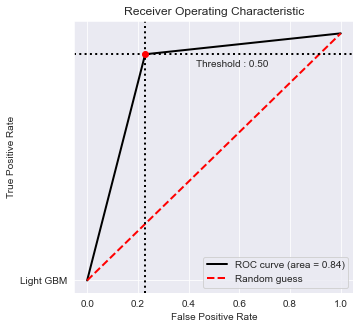

In [64]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, lightgbm_nltk_pred, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.plot("Light GBM")

In [65]:
NLTK_Results
NLTK_Results.style.set_table_attributes('style="font-size: 18px"')

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK,0.548387,0.546936,0.572519
K Nearest Neighbour,NLTK,0.705645,0.699283,0.747405
Decision Tree,NLTK,0.862903,0.857497,0.881119
Light Gradient Boosting,NLTK,0.838710,0.833638,0.859155
SVM,NLTK,0.552419,0.551956,0.568093


In [66]:
BERT_Results
BERT_Results.style.set_table_attributes('style="font-size: 18px"')

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,BERT,0.548387,0.544980,0.588235
K Nearest Neighbour,BERT,0.729839,0.721969,0.774411
Decision Tree,BERT,0.846774,0.842112,0.865248
Light Gradient Boosting,BERT,0.814516,0.810952,0.833333
SVM,BERT,0.552419,0.550391,0.581132


In [67]:
NLTK_BERT_Results
NLTK_BERT_Results.style.set_table_attributes('style="font-size: 18px"')

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK+BERT,0.580645,0.578488,0.609023
K Nearest Neighbour,NLTK+BERT,0.733871,0.728162,0.769231
Decision Tree,NLTK+BERT,0.875000,0.869817,0.891228
Light Gradient Boosting,NLTK+BERT,0.899194,0.895241,0.910394
SVM,NLTK+BERT,0.528226,0.524576,0.571429


In [68]:
Fin_BERT_Results
Fin_BERT_Results.style.set_table_attributes('style="font-size: 18px"')

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,FinBERT,0.596774,0.599739,0.583333
K Nearest Neighbour,FinBERT,0.741935,0.733898,0.785235
Decision Tree,FinBERT,0.866935,0.860952,0.885813
Light Gradient Boosting,FinBERT,0.846774,0.843286,0.862319
SVM,FinBERT,0.540323,0.546675,0.486486


In [69]:
NLTK_BERT_FinBERT_Results
NLTK_BERT_FinBERT_Results.style.set_table_attributes('style="font-size: 18px"')

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Random Forest,NLTK+BERT+FinBERT,0.576613,0.574250,0.606742
K Nearest Neighbour,NLTK+BERT+FinBERT,0.713710,0.707366,0.754325
Decision Tree,NLTK+BERT+FinBERT,0.778226,0.774381,0.801444
Light Gradient Boosting,NLTK+BERT+FinBERT,0.879032,0.879531,0.882812
SVM,NLTK+BERT+FinBERT,0.616935,0.615450,0.638783


In [70]:
Result_DataFrame = pd.concat([NLTK_Results, BERT_Results, NLTK_BERT_Results, Fin_BERT_Results, NLTK_BERT_FinBERT_Results])
Result_DataFrame.index.names = ['Classification Approach']
Result_DataFrame

,Sentiment Analyzer,Accuracy,ROC_UC,F1 Score
Classification Approach,,,,
Random Forest,NLTK,0.548387,0.546936,0.572519
K Nearest Neighbour,NLTK,0.705645,0.699283,0.747405
Decision Tree,NLTK,0.862903,0.857497,0.881119
Light Gradient Boosting,NLTK,0.838710,0.833638,0.859155
SVM,NLTK,0.552419,0.551956,0.568093
Random Forest,BERT,0.548387,0.544980,0.588235
K Nearest Neighbour,BERT,0.729839,0.721969,0.774411
Decision Tree,BERT,0.846774,0.842112,0.865248
Light Gradient Boosting,BERT,0.814516,0.810952,0.833333


In [71]:
Result_DataFrame.to_csv('Result_Data.csv')

In [72]:
Result_DataFrame_1 = Result_DataFrame.reset_index()
Result_DataFrame_1['Approach'] = Result_DataFrame_1['Classification Approach']+Result_DataFrame_1['Sentiment Analyzer']
Result_DataFrame_1 = Result_DataFrame_1[['Classification Approach', 'Sentiment Analyzer', 'Approach', 'Accuracy', 'ROC_UC','F1 Score']]
Result_DataFrame_1

,Classification Approach,Sentiment Analyzer,Approach,Accuracy,ROC_UC,F1 Score
0,Random Forest,NLTK,Random ForestNLTK,0.548387,0.546936,0.572519
1,K Nearest Neighbour,NLTK,K Nearest NeighbourNLTK,0.705645,0.699283,0.747405
2,Decision Tree,NLTK,Decision TreeNLTK,0.862903,0.857497,0.881119
3,Light Gradient Boosting,NLTK,Light Gradient BoostingNLTK,0.838710,0.833638,0.859155
4,SVM,NLTK,SVMNLTK,0.552419,0.551956,0.568093
5,Random Forest,BERT,Random ForestBERT,0.548387,0.544980,0.588235
6,K Nearest Neighbour,BERT,K Nearest NeighbourBERT,0.729839,0.721969,0.774411
7,Decision Tree,BERT,Decision TreeBERT,0.846774,0.842112,0.865248
8,Light Gradient Boosting,BERT,Light Gradient BoostingBERT,0.814516,0.810952,0.833333
9,SVM,BERT,SVMBERT,0.552419,0.550391,0.581132


In [73]:
B = Result_DataFrame_1.iloc[2,:]
B

Classification Approach        Decision Tree
Sentiment Analyzer                      NLTK
Approach                   Decision TreeNLTK
Accuracy                            0.862903
ROC_UC                              0.857497
F1 Score                            0.881119
Name: 2, dtype: object

In [74]:
cm = sns.light_palette("green", as_cmap=True)
s = Result_DataFrame_1.style.background_gradient(cmap=cm)
s

,Classification Approach,Sentiment Analyzer,Approach,Accuracy,ROC_UC,F1 Score
0,Random Forest,NLTK,Random ForestNLTK,0.548387,0.546936,0.572519
1,K Nearest Neighbour,NLTK,K Nearest NeighbourNLTK,0.705645,0.699283,0.747405
2,Decision Tree,NLTK,Decision TreeNLTK,0.862903,0.857497,0.881119
3,Light Gradient Boosting,NLTK,Light Gradient BoostingNLTK,0.838710,0.833638,0.859155
4,SVM,NLTK,SVMNLTK,0.552419,0.551956,0.568093
5,Random Forest,BERT,Random ForestBERT,0.548387,0.544980,0.588235
6,K Nearest Neighbour,BERT,K Nearest NeighbourBERT,0.729839,0.721969,0.774411
7,Decision Tree,BERT,Decision TreeBERT,0.846774,0.842112,0.865248
8,Light Gradient Boosting,BERT,Light Gradient BoostingBERT,0.814516,0.810952,0.833333
9,SVM,BERT,SVMBERT,0.552419,0.550391,0.581132


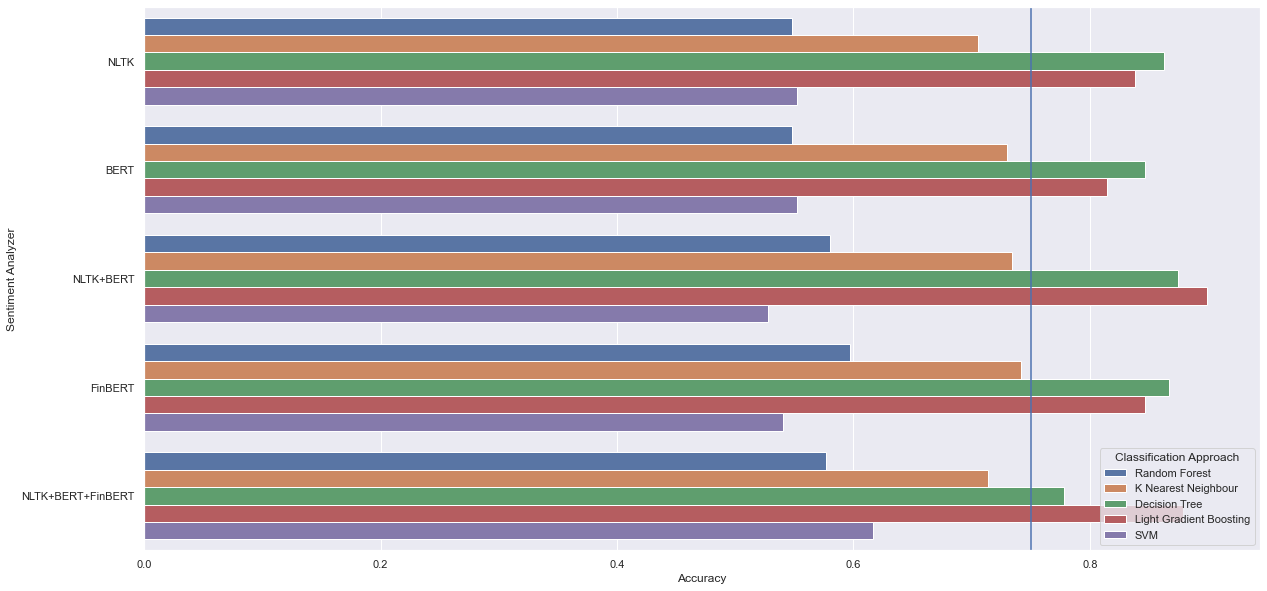

In [75]:
#I am plotting the relative performance accuracies of the classification algorithms. 
#I am setting a vertical line at 0.75, setting that as the cut off point for classification performances. 

A = Result_DataFrame.reset_index()
sns.set(style = "whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.barplot(y = "Sentiment Analyzer", x = "Accuracy", hue = "Classification Approach", data = A)
ax.axvline(0.75)

The best results for all of the classification algorithms seems to be the Decision Tree and Light Gradient Boosting ALgorithm. The best performancce is being given by the Decision Tree and Light Gradient Boosting ALgorithm for the NLTK+BERT, FinBert and NLTK+BERT+FinBERT. I will be running a statistical test of each of them to understand if the differences are statistically significant or not. As the performances of the Random forest and KNN seem to be not as effcteive as the other two , I will not be including them in the test. 

I am isolating the best accuracy algorithms and approaches below. I will isolate the Decision Tree and Light Gradient Boosting Results below and conduct statistical tests on them. 